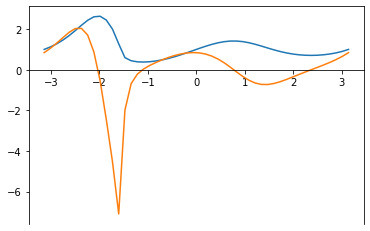

In [132]:
import sympy as sy
from matplotlib import pyplot as plt
import numpy as np

x=sy.symbols('x')
expr=(sy.sin(x)+1)**(sy.sin(sy.cos(x)))
f=sy.lambdify(x,expr,'numpy')
f_=sy.lambdify(x,sy.diff(expr,x),'numpy')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
a=np.linspace(-np.pi,np.pi)
b=f(a)
c=f_(a)
plt.plot(a, b)
plt.plot(a, c)


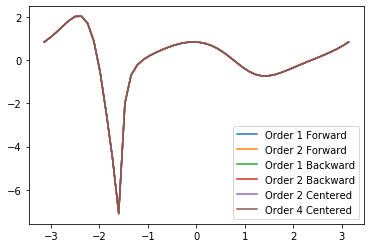

In [184]:
def fw_1(f,x,h):
    return (f(x+h)-f(x))/h
def fw_2(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)
def bw_1(f,x,h):
    return (f(x)-f(x-h))/h
def bw_2(f,x,h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)
def c_1(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)
def c_2(f,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
d=fw_1(f,a,0.001)
d1=fw_2(f,a,0.001)
d2=bw_1(f,a,0.001)
d3=bw_2(f,a,0.001)
d4=c_1(f,a,0.001)
d5=c_2(f,a,0.001)
plt.plot(a, d,label = "Order 1 Forward")
plt.plot(a, d1,label = "Order 2 Forward")
plt.plot(a, d2,label = "Order 1 Backward")
plt.plot(a, d3,label = "Order 2 Backward")
plt.plot(a, d4,label = "Order 2 Centered")
plt.plot(a, d5,label = "Order 4 Centered")
plt.legend()

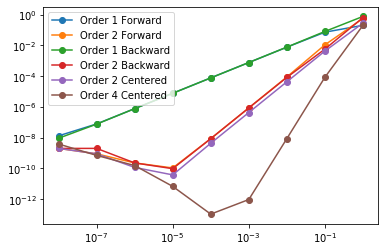

In [185]:
h=np.logspace(-8,0,9)
x=1
h1=abs(f_(x)-fw_1(f,x,h))
h2=abs(f_(x)-fw_2(f,x,h))
h3=abs(f_(x)-bw_1(f,x,h))
h4=abs(f_(x)-bw_2(f,x,h))
h5=abs(f_(x)-c_1(f,x,h))
h6=abs(f_(x)-c_2(f,x,h))
plt.loglog(h,h1,marker='o',label = "Order 1 Forward")
plt.loglog(h,h2,marker='o',label = "Order 2 Forward")
plt.loglog(h,h3,marker='o',label = "Order 1 Backward")
plt.loglog(h,h4,marker='o',label = "Order 2 Backward")
plt.loglog(h,h5,marker='o',label = "Order 2 Centered")
plt.loglog(h,h6,marker='o',label = "Order 4 Centered")
plt.legend(loc = "upper left")


In [190]:
plane=np.load('plane.npy')
a=np.deg2rad(plane[:,1])
b=np.deg2rad(plane[:,2])
x= 500*np.tan(b)/(np.tan(b)-np.tan(a))
y= x*np.tan(a)
x1=[]
y1=[]
x1.append(x[1]-x[0])
y1.append(y[1]-y[0])
for i in range(1,7):
    x1.append((x[i+1]-x[i-1])/2)
    y1.append((y[i+1]-y[i-1])/2)
x1.append(x[7]-x[6])
y1.append(y[7]-y[6])
for i in range(8):
    print('t=',7+i,', speed=',np.sqrt(x1[i]**2+y1[i]**2))

t= 7 , speed= 46.42420062213465
t= 8 , speed= 47.00103938095283
t= 9 , speed= 48.998805140367324
t= 10 , speed= 50.099441629653086
t= 11 , speed= 48.290350838205136
t= 12 , speed= 51.5645590492724
t= 13 , speed= 53.92303354505356
t= 14 , speed= 51.51480056963612


In [191]:
def jcb(f,x,h):
    n=len(x)
    e=np.eye(n)
    jc=[] 
    for i in range(n):
        x1= x +h*e[i]
        x2= x -h*e[i]
        y1 = np.array(f(x1))
        y2 = np.array(f(x2))
        jc.append((y1-y2)/(2*h))
    return np.array(jc)
        
from sympy.abc import x, y
ft = sy.lambdify([[x,y]],[x**2, x**3-y])
print(jcb(ft,[2,3], 0.00001))
print('Comparing with my own scratch work, the results is the same.')

[[ 4. 12.]
 [ 0. -1.]]
Comparing with my own scratch work, the results is the same.


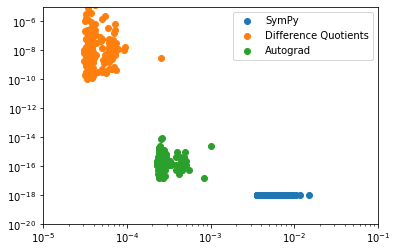

In [180]:
import time
import autograd.numpy as anp
from autograd import grad 

g= lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x)))
dg=grad(g)
err=1e-18

def processtime(N):
    time1, time2, time3=[],[],[]
    err2,err3=[],[]
    xx= np.random.uniform(-1 * np.pi, np.pi,N)
    for x0 in xx:
        st=time.perf_counter()
        f1=sy.diff(expr,x).subs(x,x0)
        ed=time.perf_counter()
        time1.append(ed-st)
        
        st=time.perf_counter()
        f2=c_2(f,x0, 0.01)
        ed=time.perf_counter()
        time2.append(ed-st)
        err2.append(abs(f2-f1))
        
        st=time.perf_counter()
        f3=dg(x0)
        ed=time.perf_counter()
        time3.append(ed-st)
        err3.append(abs(f3-f1))
        
    plt.loglog()
    plt.xlim(1e-5, 1e-1)
    plt.ylim(1e-20, 1e-5)
    plt.scatter(time1,[err]*N, label='SymPy')
    plt.scatter(time2,err2, label='Difference Quotients')
    plt.scatter(time3,err3, label='Autograd')
    plt.legend()
    
processtime(200)